Observational Hertzsprung-Russell Diagrams (HR-diagram) 

 --- data from [Gaia Archive at ESA](https://gea.esac.esa.int/archive/)

-----Huangfei Xiao for PHY521-Stars Project-----

-------------
We actually draw the Color-Magnitude diagram which is the observer's version of the Hertzsprung-Russell diagram. The abscissa is color which refers to effective temperature and the ordinate is magnitude corresponding to luminosity. 

Here, we investigate data from [Gaia Data Release 2](https://www.gaia.ac.uk/data) and [Gaia Early Data Release 3](https://www.gaia.ac.uk/data) database.

-------Preface-------

Before, we could obtain the most complete solar neighbourhood empirical HR-diagram from the HIPPARCOS data with nearby stellar catalogues to provide the faint end [(Perryman et al. 1995)](https://ui.adsabs.harvard.edu/abs/1995A%26A...304...69P/abstract). 


Gaia DR2 is probing in stellar, galactic, and extragalactic, with the global census of the whole sky, homogeneous astrometry, and photometry of unprecedented accuracy. 


[ESA's Gaia mission](https://www.gaia.ac.uk/data/gaia-data-release-1) publishes the first data release based on observations taken by the satellite between 25 July 2014 and 16 September 2015.

[Gaia DR2 data](https://www.gaia.ac.uk/data) is based on data collected between 25 July 2014 (10:30 UTC) and 23 May 2016 (11:35 UTC), spanning a period of 22 months of data collection (or 668 days), as compared to Gaia DR1 which was based on observations collected in the first 14 months of Gaia's routine operational phase.

The reference epoch for Gaia DR2 is J2015.5 (compared to the J2015.0 epoch for Gaia DR1).The time coordinate for Gaia DR2 results is the barycentric coordinate time (TCB).

[Gaia DR3 data](https://www.gaia.ac.uk/data) (both Gaia EDR3 and the full Gaia DR3) are based on data collected between 25 July 2014 (10:30 UTC) and 28 May 2017 (08:44 UTC), spanning a period of 34 months. As a comparison, Gaia DR2 was based on 22 months of data and Gaia DR1 was based on observations collected during the first 14 months of Gaia's routine operational phase.

The reference epoch for Gaia DR3 (both Gaia EDR3 and the full Gaia DR3) is 2016.0. Remember that the reference epoch is different for each Gaia data release (it was was J2015.5 for Gaia DR2 and J2015.0 for Gaia DR1).



In [1]:
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt

we use [Astroquery](https://astroquery.readthedocs.io/en/latest/) library to get Gaia data and connect to the Gaia database.

In [43]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


Then we choose the "gaiadr2.gaia_source" table and "gaiaedr3.gaia_source" table.

In [41]:
meta2 = Gaia.load_table('gaiadr2.gaia_source')
meta2

Retrieving table 'gaiadr2.gaia_source'


In [42]:
meta3 = Gaia.load_table('gaiaedr3.gaia_source')
meta3

Retrieving table 'gaiaedr3.gaia_source'


In [49]:
print(meta2)
print(meta3)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 95
TAP Table name: gaiaedr3.gaiaedr3.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 99


-----------------
Then we build the _query_ to filter the data what we need to draw an HR-diagram. We can directly use the "bp_rp" colum in the table and do some modification on the "magnitude" [(Gaia Collaboration 2018)](https://doi.org/10.1051/0004-6361/201832843). 

In [72]:
query2 = """SELECT 
TOP 10000 
phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""

query2a = """SELECT 
TOP 50000 
phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""



In [83]:
query3 = """SELECT 
TOP 10000 
phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiaedr3.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""
query3a = """SELECT 
TOP 50000 
phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""

To choose the first 10 sources to make a table then we can have an immediate feeling about data. 

In [61]:
query4 = """SELECT 
TOP 10 
source_id, ref_epoch, ra, dec, parallax, phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""

In [62]:
job4 = Gaia.launch_job(query4)
results4 = job4.get_results()
type(results4)
results4

source_id,ref_epoch,ra,dec,parallax,mg,bp_rp
,yr,deg,deg,mas,,mag
int64,float64,float64,float64,float64,float64,float32
2929638703470882816,2015.5,110.33977439874023,-21.37283854310263,1.4453772473657422,6.394691759910643,1.2857294
2929619839973730688,2015.5,109.70001686564595,-21.572337104225177,0.8669900113216593,3.007439930834657,0.5617523
2929633343352017792,2015.5,110.03850405543575,-21.522858399970517,0.3221354006467799,2.602286003061211,0.94400597
2929651004257618560,2015.5,109.85077451001992,-21.361717389745177,0.720913409102719,4.744697729025274,0.9147892
2929618809181583232,2015.5,109.72124685624935,-21.615446259353803,1.0076148386618045,3.6781167545350346,0.68708897
2929647632700884736,2015.5,109.91080931530243,-21.413518122462474,3.597160719815865,11.10160325847825,2.6804466
2929623207228128512,2015.5,109.63902312639125,-21.546350479656137,1.0130192081504108,4.16280729606712,0.75694275
2929640799415061376,2015.5,110.15607382562634,-21.38183790494565,0.2695791846896982,0.766849402959517,1.6192617


In [63]:
query6 = """SELECT 
TOP 10 
source_id, ref_epoch, ra, dec, parallax, phot_g_mean_mag+5*log10(parallax)-10 AS mg, bp_rp 
FROM gaiaedr3.gaia_source
WHERE parallax_over_error > 10
    AND phot_g_mean_flux_over_error>50
    AND phot_rp_mean_flux_over_error>20
    AND phot_bp_mean_flux_over_error>20
    AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND visibility_periods_used>8
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
"""

In [64]:
job6 = Gaia.launch_job(query6)
results6 = job6.get_results()
type(results6)
results6

source_id,ref_epoch,ra,dec,parallax,mg,bp_rp
,yr,deg,deg,mas,,mag
int64,float64,float64,float64,float64,float64,float32
2878790585644508032,2016.0,358.5445843725359,35.866174129792405,0.9292365778477512,6.419252394356871,1.2538376
2878790654363983488,2016.0,358.5221135344183,35.88420115480946,15.181807251945203,10.882761203609387,2.7459478
3126709189034630784,2016.0,99.52670404265598,1.8055721777036375,0.7416722170211635,5.75941195160212,1.1346083
5982641988824598656,2016.0,239.0965957421644,-49.89947236659594,0.7124334477215288,4.311712302793197,1.283678
2878790860522354816,2016.0,358.4756740637344,35.85120810448098,1.4956210962135832,5.075830057019866,0.89469147
2878790890586102528,2016.0,358.45031189498354,35.85063396462692,0.6483331661253947,5.461485625220222,0.96762085
2878790963601569792,2016.0,358.4810915013304,35.8561719893098,1.0156003455667368,6.758477252238844,1.4359102
2875033142095888000,2016.0,0.5770567481952239,33.537827364373186,1.466808718353628,7.078508572241713,1.4571581


[Gaia Data Release 2 Documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html)


phot_g_mean_mag:
 G-band mean magnitude (float, Magnitude[mag])
 Mean magnitude in the G band. This is computed from the G-band mean flux applying the magnitude zero-point in the Vega scale.
[No error is provided for this quantity as the error distribution is only symmetric in flux space. This converts to an asymmetric error distribution in magnitude space which cannot be represented by a single error value.]

bp_rp : BP - RP colour (float, Magnitude[mag]) . BP - RP colour: phot_bp_mean_mag - phot_rp_mean_mag


In [104]:
job2 = Gaia.launch_job_async(query2)

INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
job2a = Gaia.launch_job_async(query2a)

In [ ]:
results2 = job2.get_results()
results2a = job2a.get_results()

In [103]:
job3 = Gaia.launch_job_async(query3)

INFO: Query finished. [astroquery.utils.tap.core]


In [106]:
job3a = Gaia.launch_job_async(query3a)

INFO: Query finished. [astroquery.utils.tap.core]


In [108]:
results3 = job3.get_results()
results3a = job3a.get_results()

In [100]:
def HR_diag(table):
    """Plot a color magnitude diagram.
    
    table: Table or DataFrame with photometry data
    """
    #y = table['phot_g_mean_mag']
    y = table['mg']
    x = table['bp_rp']

    plt.plot(x, y, 'o', markersize=0.3)
    #plt.plot(x, y)

    #plt.xlim([-0.75, 2])
    #plt.ylim([14,22])
    plt.gca().invert_yaxis()
    
    plt.text(2.37, 6.5, r"main sequence")
    plt.text(0.5, 12.5, r"white dwarfs")
    plt.text(2.5, -1,"giant branch")

    plt.ylabel('$Magnitude (g)$')
    plt.xlabel('$Color (B-V)$')

'select 10000 sources '

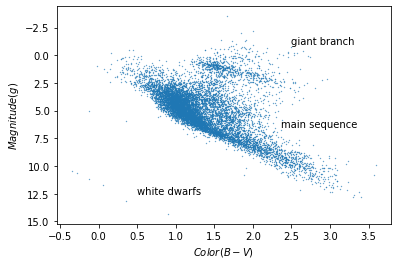

In [113]:
HR_diag(results2)
"""select 10000 sources """

'select 50000 sources'

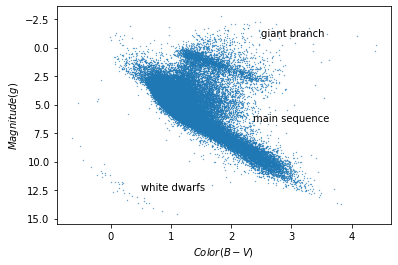

In [114]:
HR_diag(results2a)
"""select 50000 sources"""

'select 10000 sources'

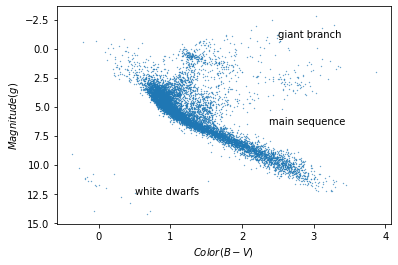

In [117]:
HR_diag(results3)
"""select 10000 sources"""

'select 50000 sources'

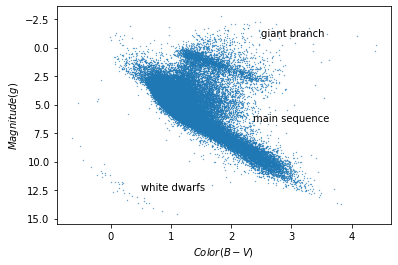

In [118]:
HR_diag(results3a)
"""select 50000 sources"""